# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [6]:
dataset = pd.read_csv('dat.csv')
print(dataset.head())

    Moisture  rainfall  Average Humidity  Mean Temp  max Temp  Min temp  \
0  12.801685  0.012360                57         62        71        52   
1  12.851654  0.004172                57         58        73        43   
2  12.776773  0.000000                56         58        69        46   
3  12.942001  0.031747                62         56        70        43   
4  12.984652  0.000000                65         56        70        42   

   alkaline  sandy  chalky  clay  millet yield  Outcomes  
0         0      1       0     0             2         1  
1         0      1       0     0             0         1  
2         0      0       1     0             4         0  
3         0      1       0     0             0         1  
4         0      0       0     1             1         0  


In [27]:
x = dataset.iloc[: , :-2].values
y = dataset.iloc[: , -2].values

## Splitting the **dataset** into Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0 )

## **Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the SVM Model on the Training set

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

# Predicting the New Result

In [34]:
print(classifier.predict(sc.transform([[12.80168453,0.0123605,57,62,71,52,0,1,0,0]])))

[4]


# Predicting the Test Result

In [35]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4 4]
 [4 2]
 [4 4]
 [0 0]
 [2 2]
 [1 1]
 [0 2]
 [4 0]
 [1 1]
 [4 4]
 [4 0]
 [4 4]
 [2 2]
 [2 4]
 [0 4]
 [2 2]
 [4 4]
 [4 0]
 [2 0]
 [0 0]
 [1 1]
 [2 2]
 [4 4]
 [1 1]
 [2 0]
 [2 2]
 [2 3]
 [4 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [4 0]
 [1 1]
 [2 0]
 [1 4]
 [0 4]
 [0 0]
 [2 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 4]
 [2 2]
 [0 4]
 [0 0]
 [2 4]
 [1 1]
 [1 1]
 [4 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [4 4]
 [1 1]
 [0 0]
 [1 1]
 [4 0]
 [4 0]
 [1 1]
 [2 0]
 [0 0]
 [4 4]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [4 4]
 [4 0]
 [1 1]
 [0 2]
 [2 2]
 [4 0]
 [4 4]
 [0 0]
 [0 0]
 [4 4]
 [4 4]
 [2 2]
 [4 0]
 [0 0]
 [4 0]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [4 0]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [4 4]
 [4 0]
 [4 4]
 [0 0]
 [0 0]
 [4 0]
 [0 0]
 [2 0]
 [0 4]
 [2 2]
 [2 2]
 [2 2]
 [0 4]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [4 4]
 [1 1]
 [0 0]
 [1 1]
 [4 4]
 [1 1]
 [2 2]
 [4 0]
 [2 2]
 [4 2]
 [0 0]
 [4 4]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [0 4]
 [2 2]
 [4 4]
 [2 2]
 [0 0]
 [4 0]
 [4 0]
 [1 1]
 [1 1]
 [0 0]
 [2 1]
 [0 0]
 [1 1]

# Making Confusion

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[31  0  7  0 19]
 [ 0 34  1  0  0]
 [ 2  0 25  0  3]
 [ 0  0  1  0  0]
 [ 6  2  4  0 25]]


In [37]:
accuracy_score(y_test,y_pred)

0.71875

# Visualising  the Training results

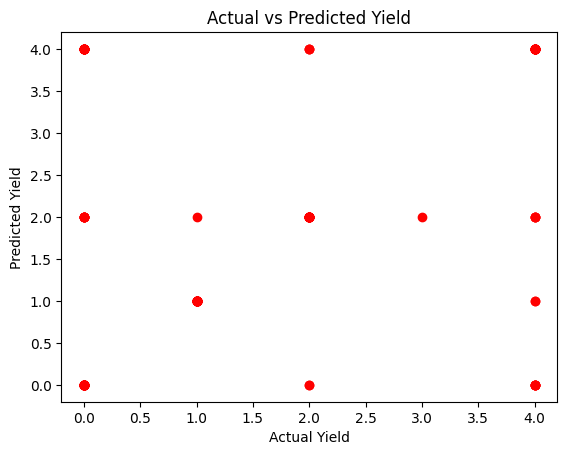

In [46]:
plt.scatter(y_test, y_pred, color = 'red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()